### Added New ERatio and Compute Gap Functions for Finding the Cutoff Points for Each Method

In [1]:
import sys
sys.path.append('../pcqc')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pcqc import *
from kruskal_best_pcs import *

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
import kruskal_best_pcs as kbp

In [3]:
output_plots = 'pbmc_plots/pca_analysis_pt6.pdf'
plot_dictionary = dict()

In [4]:
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
adata = sc.read(filename = 'pbmc_sample_preprocess.h5ad')

In [6]:
data = adata.X

In [7]:
data

array([[-0.25998061,  3.92204492, -0.0546509 , ..., -0.12242513,
        -0.19372593,  1.29672057],
       [ 3.43839295, -0.43090892, -0.09560866, ..., -0.10493263,
        -0.21440517, -0.47285539],
       [-0.19961271, -0.24881491, -0.04854428, ..., -0.0594832 ,
        -0.17273981, -0.44673145],
       ...,
       [-0.1904076 , -0.26135516, -0.05301923, ..., -0.05610365,
        -0.17459814, -0.43748468],
       [-0.27059744, -0.24751886, -0.03798715, ..., -0.11309291,
        -0.18081998,  1.34547647],
       [-0.23701152, -0.20247551, -0.0315205 , ..., -0.07454474,
        -0.16627248, -0.48526704]])

In [8]:
pca = PC_Cluster(n_pcs = 100)
pca.fit(data)
pca.norm_eigenvalues[0:20]

array([0.02186993, 0.01190551, 0.01034145, 0.00825553, 0.00498603,
       0.00279504, 0.00254421, 0.00210374, 0.00204177, 0.00200325,
       0.00197649, 0.0019612 , 0.00192873, 0.00191983, 0.00191278,
       0.00190672, 0.00190342, 0.0018894 , 0.00188229, 0.00187142])

In [9]:
pca.singular_values[0:40]

array([284.74809405, 210.09281453, 195.80682604, 174.94829257,
       135.96111776, 101.79601473,  97.1211006 ,  88.3146946 ,
        87.00436699,  86.17954647,  85.60200427,  85.27039821,
        84.56148514,  84.36618273,  84.21122961,  84.07773302,
        84.0048955 ,  83.69499705,  83.53738773,  83.29564841,
        83.12122866,  82.94358832,  82.73092016,  82.60524478,
        82.44732922,  82.3136561 ,  82.20434445,  82.03191173,
        81.87265862,  81.81140846,  81.64068676,  81.49684512,
        81.41659485,  81.300227  ,  81.23051562,  81.1234918 ,
        81.05710868,  80.85604686,  80.78368968,  80.73809225])

In [10]:
pca.pc_distribution()
pca.df_pca_dist.head()

,PC_Dist_0,PC_Dist_1,PC_Dist_2,PC_Dist_3,PC_Dist_4,PC_Dist_5,PC_Dist_6,PC_Dist_7,PC_Dist_8,PC_Dist_9,...,PC_Dist_90,PC_Dist_91,PC_Dist_92,PC_Dist_93,PC_Dist_94,PC_Dist_95,PC_Dist_96,PC_Dist_97,PC_Dist_98,PC_Dist_99
0,0.000003,8.850121e-07,1.300548e-07,8.796138e-07,9.749752e-07,6.006268e-07,9.185879e-07,7.911320e-08,1.611194e-07,7.142164e-08,...,9.211127e-07,6.628351e-07,1.239557e-07,1.077276e-08,5.865205e-07,8.726920e-07,8.036498e-07,1.555162e-07,2.509609e-07,1.352391e-06
1,0.000003,4.238507e-08,1.377702e-09,5.568555e-06,6.378399e-08,3.087902e-07,1.085274e-06,3.605502e-08,2.754040e-06,7.979202e-07,...,1.651145e-06,7.397646e-07,2.376498e-07,1.453506e-06,7.682039e-08,1.164342e-08,4.423506e-07,5.204098e-07,2.847929e-08,1.296898e-07
2,0.000004,1.072428e-07,9.275353e-09,2.534746e-06,2.579451e-07,1.029801e-08,1.192669e-06,1.809750e-06,2.151510e-06,7.104612e-07,...,2.470410e-08,4.530108e-10,6.014999e-08,2.680059e-07,5.812913e-06,1.959971e-06,4.081172e-07,2.927101e-08,2.887069e-07,1.560194e-07
3,0.000002,5.355925e-09,2.004323e-08,3.367279e-06,2.147021e-08,1.093098e-07,1.634498e-08,1.551529e-07,9.526242e-08,3.006176e-08,...,3.047232e-07,4.312149e-07,1.566493e-07,2.112885e-08,1.953438e-07,1.049965e-07,2.320112e-08,3.103239e-07,1.846072e-07,1.875107e-07
4,0.000003,1.019421e-06,5.293710e-09,1.335980e-06,1.291377e-07,1.093313e-07,1.016382e-07,1.678971e-07,1.265763e-07,3.063849e-07,...,2.115615e-07,1.857894e-07,6.619624e-07,7.258399e-08,6.635465e-07,4.234796e-07,1.621002e-07,3.975658e-08,3.047758e-07,5.426198e-08


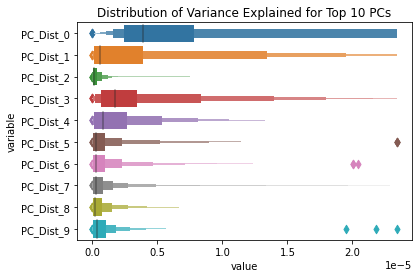

In [11]:
pc_distplot(pca, cols = np.arange(0,10))
plt.title('Distribution of Variance Explained for Top 10 PCs')
plot_dictionary['Boxenplot'] = plt.gca().get_figure()

In [12]:
pca.pc_stats(thresholds=[0.9,0.95,0.98,0.99,0.995])

In [13]:
1e-6*pca.df_pc_stats.sort_values(by = '100.0_Percentile',ascending = False).head(20)

,90.0_Percentile,95.0_Percentile,98.0_Percentile,99.0_Percentile,100.0_Percentile,evalue,rank
PC_Dist_2,8.937955e-13,1.281261e-12,1.790675e-12,2.444145e-12,1.411886e-10,1.034145e-08,0.000003
PC_Dist_1,1.530873e-11,2.573441e-11,4.649619e-11,5.755247e-11,6.143943e-11,1.190551e-08,0.000002
PC_Dist_0,3.070177e-11,3.753743e-11,4.357857e-11,4.707345e-11,5.202399e-11,2.186993e-08,0.000001
PC_Dist_3,1.057385e-11,1.523524e-11,2.034017e-11,2.525699e-11,2.948231e-11,8.255534e-09,0.000004
PC_Dist_7,1.911522e-12,3.308870e-12,6.987159e-12,1.146351e-11,1.924931e-11,2.103738e-09,0.000008
PC_Dist_4,6.235669e-12,8.775100e-12,1.255835e-11,1.470140e-11,1.760286e-11,4.986034e-09,0.000005
PC_Dist_5,3.047655e-12,6.343052e-12,1.079666e-11,1.361631e-11,1.647633e-11,2.795035e-09,0.000006
PC_Dist_8,1.849066e-12,3.059671e-12,6.094892e-12,8.031230e-12,1.472356e-11,2.041775e-09,0.000009
PC_Dist_6,3.023852e-12,5.615551e-12,8.654113e-12,1.114632e-11,1.395959e-11,2.544210e-09,0.000007
PC_Dist_10,1.898662e-12,3.252918e-12,5.688720e-12,7.886136e-12,1.361753e-11,1.976485e-09,0.000011


In [14]:
def compute_gap(df, var_name):
    nrows = df.shape[0]
    df = df.sort_values(by = var_name,ascending = False).reset_index()
    ratios = np.divide(df.loc[0:nrows-2,var_name].values,df.loc[1:nrows-1,var_name].values)
    top_args = np.argsort(-1*ratios)
    top_gaps = -1*np.sort(-1*ratios)
    gap_stats = pd.DataFrame(top_args, columns = ['args'])
    gap_stats['gaps'] = top_gaps
    return gap_stats

In [16]:
#Top 7 looks like a good stopping place- 20% difference
gap_stats = compute_gap(pca.df_pc_stats,'evalue')
gap_stats[0:10]

,args,gaps
0,0,1.836958
1,4,1.783889
2,3,1.655732
3,2,1.252669
4,6,1.209376
5,1,1.151242
6,5,1.098587
7,7,1.030348
8,8,1.019234
9,11,1.016837


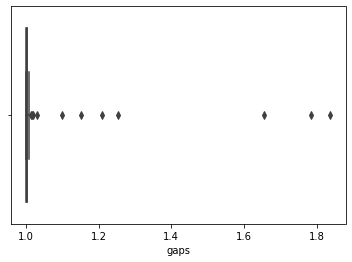

In [17]:
sns.boxplot(gap_stats['gaps'])

In [18]:
gap_stats = compute_gap(pca.df_pc_stats,'100.0_Percentile')

In [19]:
#top 10 (maybe 11)
gap_stats[0:12]

,args,gaps
0,0,2.298013
1,2,1.764583
2,3,1.531604
3,9,1.276074
4,1,1.180983
5,6,1.119045
6,4,1.093533
7,10,1.075781
8,5,1.068373
9,12,1.060855


In [69]:
#top 9
gap_stats = compute_gap(pca.df_pc_stats,'98.0_Percentile')
gap_stats[0:12]

,args,gaps
0,1,2.142489
1,98,1.992333
2,2,1.619653
3,4,1.247576
4,5,1.238574
5,3,1.163170
6,6,1.146396
7,8,1.094597
8,7,1.071400
9,0,1.066951


In [70]:
1e-6*pca.df_pc_stats.sort_values(by = '98.0_Percentile',ascending = False).head(20)

,90.0_Percentile,95.0_Percentile,98.0_Percentile,99.0_Percentile,100.0_Percentile,evalue,rank
PC_Dist_1,1.530873e-11,2.573441e-11,4.649619e-11,5.755247e-11,6.143943e-11,1.190551e-08,0.000002
PC_Dist_0,3.070177e-11,3.753743e-11,4.357857e-11,4.707345e-11,5.202399e-11,2.186993e-08,0.000001
PC_Dist_3,1.057385e-11,1.523524e-11,2.034017e-11,2.525699e-11,2.948231e-11,8.255534e-09,0.000004
PC_Dist_4,6.235669e-12,8.775100e-12,1.255835e-11,1.470140e-11,1.760286e-11,4.986034e-09,0.000005
PC_Dist_5,3.047655e-12,6.343052e-12,1.079666e-11,1.361631e-11,1.647633e-11,2.795035e-09,0.000006
PC_Dist_6,3.023852e-12,5.615551e-12,8.654113e-12,1.114632e-11,1.395959e-11,2.544210e-09,0.000007
PC_Dist_7,1.911522e-12,3.308870e-12,6.987159e-12,1.146351e-11,1.924931e-11,2.103738e-09,0.000008
PC_Dist_8,1.849066e-12,3.059671e-12,6.094892e-12,8.031230e-12,1.472356e-11,2.041775e-09,0.000009
PC_Dist_10,1.898662e-12,3.252918e-12,5.688720e-12,7.886136e-12,1.361753e-11,1.976485e-09,0.000011
PC_Dist_17,2.106053e-12,3.286678e-12,5.197090e-12,7.256173e-12,8.753941e-12,1.889404e-09,0.000018


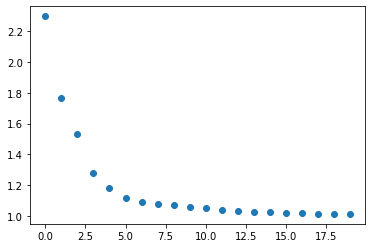

In [20]:
#scree plot of ratios from a scree plot
plt.scatter(x = np.arange(20), y = gap_stats.loc[0:19,'gaps'])

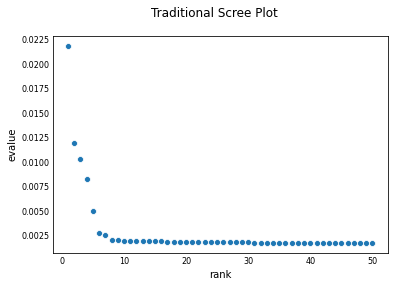

In [27]:
scatter_scree_plot(pca)
plot_dictionary['Traditional Scree Plot'] = plt.gca().get_figure()

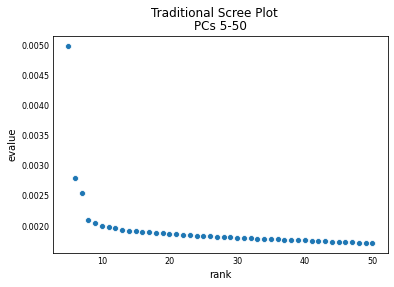

In [28]:
#0-6 look significant
scatter_scree_plot(pca, rank = np.arange(5,51))
plt.title('PCs 5-50')
plot_dictionary['Traditional Scree Plot, 5-50'] = plt.gca().get_figure()

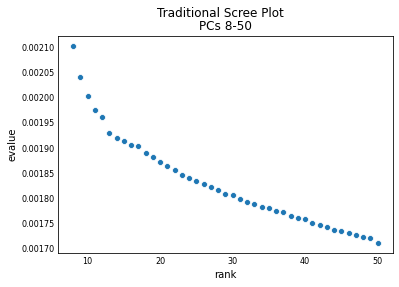

In [29]:
#another gap at 12-13
scatter_scree_plot(pca, rank = np.arange(8,51))
plt.title('PCs 8-50')
plot_dictionary['Traditional Scree Plot, 8-50'] = plt.gca().get_figure()

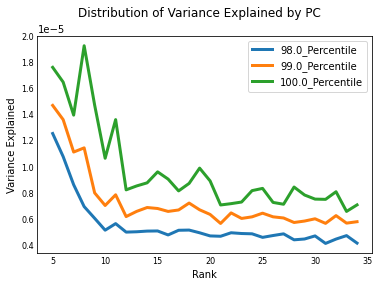

In [32]:
fig = dist_var_pc_plot(pca, rank = np.arange(5,35), threshold_subset = ['98.0_Percentile',
                                                                        '99.0_Percentile',
                                                                        '100.0_Percentile'])
plot_dictionary['PCQC_NotSorted'] = plt.gca().get_figure()

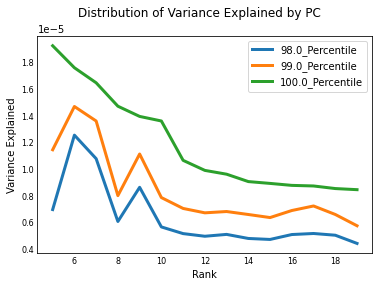

In [33]:
fig = sorted_dist_var_pc_plot(pca, rank = np.arange(5,20), sort_var = '100.0_Percentile', 
                             threshold_subset =                       ['98.0_Percentile',
                                                                        '99.0_Percentile',
                                                                        '100.0_Percentile'])

plot_dictionary['PCQC_Sorted'] = plt.gca().get_figure()

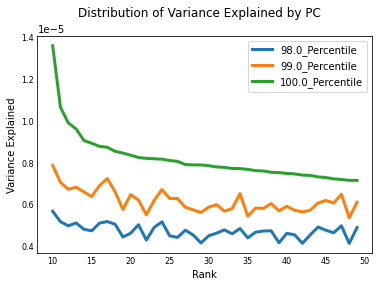

In [34]:
#pcqc somewhere between 10 and 15
fig = sorted_dist_var_pc_plot(pca, rank = np.arange(10,50), sort_var = '100.0_Percentile', 
                             threshold_subset =                       ['98.0_Percentile',
                                                                        '99.0_Percentile',
                                                                        '100.0_Percentile'])

plot_dictionary['PCQC_Sorted_Window'] = plt.gca().get_figure()

### Kruskal

In [35]:
pca.select_top_pcs(criteria = 'evalue', n_top_pcs = 20)

In [36]:
reduced_matrix = pca.use_top_pcs()

In [37]:
reduced_matrix.shape

(2328, 20)

In [38]:
def compute_best_pcs(reduced_matrix, n_neighbors, resolution, threshold = 1e-6, max_discard = 20):
    #max discard, max number of pcs that are discarded in a single round 
    df = pd.DataFrame(reduced_matrix)
    finished = False
    index = 0
    while not finished:
        adata = sc.AnnData(X = reduced_matrix)
        sc.pp.neighbors(adata, n_neighbors = n_neighbors, use_rep = 'X')
        sc.tl.leiden(adata, resolution = resolution, random_state = np.random.randint(100))
        df['Clusters'] = adata.obs['leiden'].values
        valid_cols = [col for col in df.columns if col != 'Clusters']
        kruskal_test, best_pcs = pc_kruskal_test(df,col_names = valid_cols, threshold = threshold)
        candidates_to_elim = np.where(np.array(kruskal_test) > threshold)
        #get max discard lowest values
        #print(kruskal_test)
        #print(candidates_to_elim)
        
        lowest_values = np.argsort(-1*np.array(kruskal_test))[0:max_discard]
        #print(lowest_values)
        to_discard = []
        for value in lowest_values:
            if kruskal_test[value] > threshold:
                to_discard.append(value)
        #print(to_discard)
        to_keep = [col for i,col in enumerate(df.columns) if i not in to_discard]
        if len(to_discard) == 0:
            finished = True
        else:
            df = df[to_keep]
            reduced_matrix = df.values
        
    return df,kruskal_test

In [39]:
def strat_pc_kruskal_test(df, col_names = np.arange(30), group_id = 'Clusters',
                        threshold = 1e-3, sample_n = 100):

    #sample bootstrap 100 records from each group,
    new_df_list = []
    for group in df[group_id].unique():
        sub_df = df.loc[df[group_id] == group].reset_index(drop = True)
        new_sample = sub_df.sample(n = sample_n, replace = True)
        new_df_list.append(new_sample)
    new_df = pd.concat(new_df_list).reset_index(drop = True)
    kruskal_test, best_pcs = pc_kruskal_test(new_df, col_names = col_names,
                            group_id = group_id, threshold = threshold)
    return kruskal_test, best_pcs

In [40]:
def compute_best_pcs_strat(reduced_matrix, n_neighbors, resolution, threshold = 1e-6, max_discard = 20):
    #max discard, max number of pcs that are discarded in a single round 
    df = pd.DataFrame(reduced_matrix)
    finished = False
    index = 0
    while not finished:
        adata = sc.AnnData(X = reduced_matrix)
        sc.pp.neighbors(adata, n_neighbors = n_neighbors, use_rep = 'X')
        sc.tl.leiden(adata, resolution = resolution, random_state = np.random.randint(100))
        df['Clusters'] = adata.obs['leiden'].values
        valid_cols = [col for col in df.columns if col != 'Clusters']
        kruskal_test, best_pcs = strat_pc_kruskal_test(df,col_names = valid_cols, threshold = threshold)
        candidates_to_elim = np.where(np.array(kruskal_test) > threshold)
        #get max discard lowest values
        #print(kruskal_test)
        #print(candidates_to_elim)
        
        lowest_values = np.argsort(-1*np.array(kruskal_test))[0:max_discard]
        #print(lowest_values)
        to_discard = []
        for value in lowest_values:
            if kruskal_test[value] > threshold:
                to_discard.append(value)
        #print(to_discard)
        to_keep = [col for i,col in enumerate(df.columns) if i not in to_discard]
        if len(to_discard) == 0:
            finished = True
        else:
            df = df[to_keep]
            reduced_matrix = df.values
        
    return df,kruskal_test

In [41]:
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)

In [42]:
y = np.log10(np.array(kruskal)+1e-300)

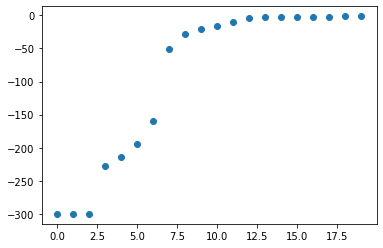

In [43]:
#good threshold would be between 1e-40, 1e-50
plt.scatter(x = np.arange(len(y)), y = np.sort(y))

In [44]:
#top 7 looks good, followed by 8,9,11
y

array([-300.        , -300.        , -214.60988714, -300.        ,
       -228.12642513, -159.35758798, -193.86595476,  -28.827755  ,
        -20.8488094 ,   -2.9581483 ,  -50.32873661,  -10.52511011,
        -15.38504896,   -2.75209077,   -1.54060803,   -1.33241791,
         -4.15063228,   -2.2076864 ,   -2.87324582,   -1.96413462])

### Iterate- Try on 15 PCs

[-300.         -300.         -216.74828625 -300.         -270.82072755
 -179.56525717 -218.42604959  -30.67261428  -24.64160015  -56.02212863]


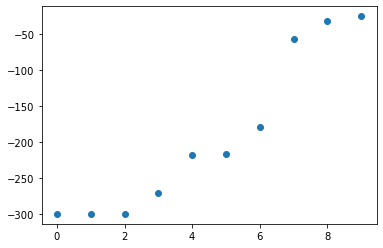

In [45]:
reduced_matrix = pca.use_top_pcs()
cols = [0,1,2,3,4,5,6,7,8,10]
reduced_matrix = reduced_matrix[:,cols]
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)
y = np.log10(np.array(kruskal)+1e-300)
print(y)
plt.scatter(x = np.arange(len(y)), y = np.sort(y))

[-300.         -300.         -213.58916744 -300.         -299.79348916
 -195.19824564 -245.62551696  -85.7330368 ]


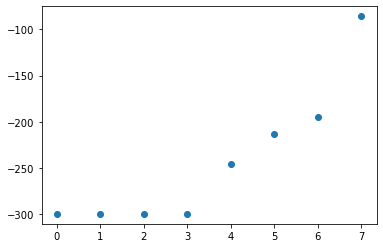

In [46]:
reduced_matrix = pca.use_top_pcs()
cols = [0,1,2,3,4,5,6,10]
reduced_matrix = reduced_matrix[:,cols]
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)
y = np.log10(np.array(kruskal)+1e-300)
print(y)
plt.scatter(x = np.arange(len(y)), y = np.sort(y))

### Stratified

In [47]:
pca.select_top_pcs(criteria = 'evalue', n_top_pcs = 25)
reduced_matrix = pca.use_top_pcs()
_, kruskal = compute_best_pcs_strat(reduced_matrix, 15, .8, threshold = 1)

In [48]:
reduced_matrix.shape

(2328, 25)

[-1.52755549e+02 -1.65808412e+02 -1.14377136e+02 -1.48911623e+02
 -1.04937004e+02 -1.16734623e+02 -1.01371351e+02 -5.57030567e+01
 -3.86604742e+01 -2.77734457e+00 -4.44578399e+01 -1.34175975e+01
 -3.79841102e+01 -2.88481530e+00 -1.07505624e+01 -7.81871547e+00
 -2.46927589e+00 -1.07097654e+01 -6.68864050e-02 -2.21406117e+00
 -1.81512318e+01 -9.77193646e+00 -1.25926626e+01 -2.95473328e+00
 -5.13968604e+00]


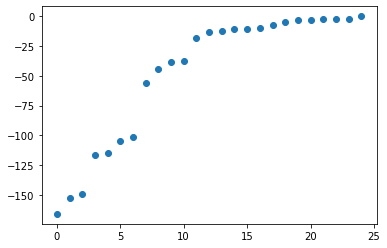

In [49]:
# 0-8,10-12,20
y = np.log10(np.array(kruskal)+1e-300)
print(y)
plt.scatter(x = np.arange(len(y)), y = np.sort(y))

In [50]:
gap_stats = compute_gap(pd.DataFrame(-1*np.sort(y),columns = ['kruskal']),'kruskal')

In [51]:
#PICKS UP top 7 and top 13
gap_stats

,args,gaps
0,23,33.101812
1,10,2.092646
2,6,1.819853
3,18,1.739475
4,17,1.521244
5,11,1.352793
6,2,1.275642
7,7,1.252941
8,16,1.249814
9,13,1.171349


### PCQC

In [52]:
pca.select_top_pcs(criteria = '100.0_Percentile', n_top_pcs = 15)

[-2.16023857e+02 -3.00000000e+02 -3.00000000e+02 -3.00000000e+02
 -2.69964337e+01 -2.48434923e+02 -1.72546798e+02 -2.51412189e+01
 -1.95040707e+02 -4.66553581e+01 -1.66756115e+00 -1.40945099e-01
 -1.66626448e+00 -1.05739735e+01 -3.68292493e-02]


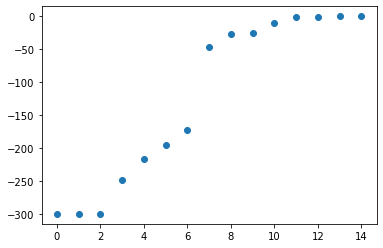

In [53]:
reduced_matrix = pca.use_top_pcs()
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)
y = np.log10(np.array(kruskal)+1e-300)
print(y)
plt.scatter(x = np.arange(len(y)), y = np.sort(y))

[-213.49647028 -300.         -300.         -300.         -300.
 -189.45888422 -229.21659886  -89.61794452]


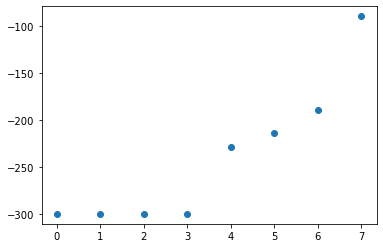

In [54]:
reduced_matrix = pca.use_top_pcs()
cols = [0,1,2,3,5,6,8,9]
reduced_matrix = reduced_matrix[:,cols]
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)
y = np.log10(np.array(kruskal)+1e-300)
print(y)
plt.scatter(x = np.arange(len(y)), y = np.sort(y))

In [55]:
# recovers 0,1,2,3,4,5,6,10
1e-6*pca.df_pc_stats.head(20).sort_values(by = '100.0_Percentile',ascending = False)

,90.0_Percentile,95.0_Percentile,98.0_Percentile,99.0_Percentile,100.0_Percentile,evalue,rank
PC_Dist_2,8.937955e-13,1.281261e-12,1.790675e-12,2.444145e-12,1.411886e-10,1.034145e-08,0.000003
PC_Dist_1,1.530873e-11,2.573441e-11,4.649619e-11,5.755247e-11,6.143943e-11,1.190551e-08,0.000002
PC_Dist_0,3.070177e-11,3.753743e-11,4.357857e-11,4.707345e-11,5.202399e-11,2.186993e-08,0.000001
PC_Dist_3,1.057385e-11,1.523524e-11,2.034017e-11,2.525699e-11,2.948231e-11,8.255534e-09,0.000004
PC_Dist_7,1.911522e-12,3.308870e-12,6.987159e-12,1.146351e-11,1.924931e-11,2.103738e-09,0.000008
PC_Dist_4,6.235669e-12,8.775100e-12,1.255835e-11,1.470140e-11,1.760286e-11,4.986034e-09,0.000005
PC_Dist_5,3.047655e-12,6.343052e-12,1.079666e-11,1.361631e-11,1.647633e-11,2.795035e-09,0.000006
PC_Dist_8,1.849066e-12,3.059671e-12,6.094892e-12,8.031230e-12,1.472356e-11,2.041775e-09,0.000009
PC_Dist_6,3.023852e-12,5.615551e-12,8.654113e-12,1.114632e-11,1.395959e-11,2.544210e-09,0.000007
PC_Dist_10,1.898662e-12,3.252918e-12,5.688720e-12,7.886136e-12,1.361753e-11,1.976485e-09,0.000011


### Permutation Test
First 7 are obvious choices, (could possibly detect first 12 with a scree plot), first 19 are statistically significnt.

In [56]:
mtrx = data
perm_test = permutation_test(mtrx, trials = 20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [57]:
sorted_svalues = -1*np.sort(-1*perm_test.max())
sorted_svalues

array([86.92997261, 86.63962565, 86.24653387, 86.00881776, 85.95354405,
       85.6076141 , 85.43362158, 85.24087899, 85.10390903, 84.97032079,
       84.81172443, 84.66642269, 84.38889665, 84.24315708, 84.09510899,
       83.95908644, 83.88515255, 83.71370983, 83.59167288, 83.45967935,
       83.354524  , 83.22542119, 83.01128305, 82.92133046, 82.79186798,
       82.72429867, 82.63666344, 82.48171813, 82.40799006, 82.29591937,
       82.23410712, 82.10088166, 81.94823581, 81.89584592, 81.79066069,
       81.63955487, 81.51704922, 81.45967152, 81.3353977 , 81.25252084,
       81.10868528, 81.01664604, 80.95818523, 80.89493683, 80.76004709,
       80.61293036, 80.50011488, 80.41515393, 80.31784368, 80.21373568,
       80.15102462, 80.06877114, 79.98216213, 79.90736532, 79.77339819,
       79.71882064, 79.64882827, 79.56010016, 79.40643369, 79.32946907,
       79.28562371, 79.22246293, 79.14045667, 79.08569008, 78.89463937,
       78.83115473, 78.72470843, 78.69220953, 78.60309219, 78.51

In [58]:
pca.singular_values

array([284.74809405, 210.09281453, 195.80682604, 174.94829257,
       135.96111776, 101.79601473,  97.1211006 ,  88.3146946 ,
        87.00436699,  86.17954647,  85.60200427,  85.27039821,
        84.56148514,  84.36618273,  84.21122961,  84.07773302,
        84.0048955 ,  83.69499705,  83.53738773,  83.29564841,
        83.12122866,  82.94358832,  82.73092016,  82.60524478,
        82.44732922,  82.3136561 ,  82.20434445,  82.03191173,
        81.87265862,  81.81140846,  81.64068676,  81.49684512,
        81.41659485,  81.300227  ,  81.23051562,  81.1234918 ,
        81.05710868,  80.85604686,  80.78368968,  80.73809225,
        80.53352136,  80.46246975,  80.3759233 ,  80.21567864,
        80.1615615 ,  80.10109395,  79.98544407,  79.88792821,
        79.86700199,  79.60949602,  79.57194011,  79.50530486,
        79.43393385,  79.20582496,  79.07398236,  78.9706704 ,
        78.94571209,  78.87871353,  78.78190526,  78.63597055,
        78.51703044,  78.49404965,  78.36574974,  78.24

In [59]:
np.sum(pca.singular_values > sorted_svalues)

17

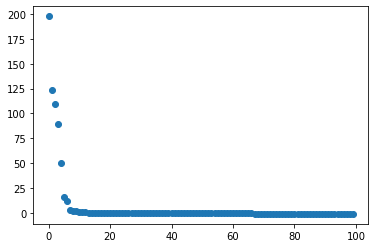

In [60]:
plt.scatter(x = np.arange(100), y = pca.singular_values - sorted_svalues)

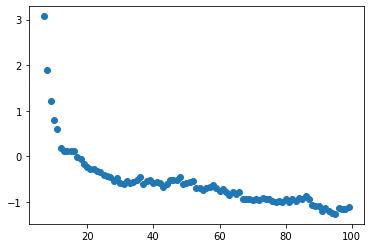

In [61]:
plt.scatter(x = np.arange(7,100), y = pca.singular_values[7:] - sorted_svalues[7:])

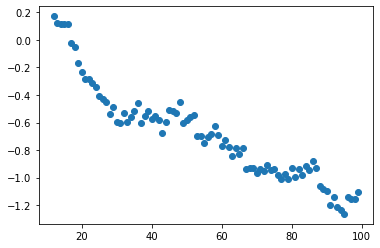

In [62]:
plt.scatter(x = np.arange(12,100), y = pca.singular_values[12:] - sorted_svalues[12:])

In [ ]:
#compute X/E(X)

In [63]:
def compute_e_ratio(svalues,perm):
    answer = np.divide(svalues,perm)
    answer = np.power(answer, 2)
    df = pd.DataFrame(answer,columns = ['E_Ratio'])
    return df

In [64]:
sorted_medians = -1*np.sort(-1*perm_test.median())
e_ratio = compute_e_ratio(pca.singular_values,sorted_medians)

In [65]:
#really want the median
#again picks up top 7
e_ratio[0:15]

,E_Ratio
0,10.798051
1,5.932922
2,5.182843
3,4.152167
4,2.523598
5,1.423128
6,1.300636
7,1.079572
8,1.051761
9,1.036556


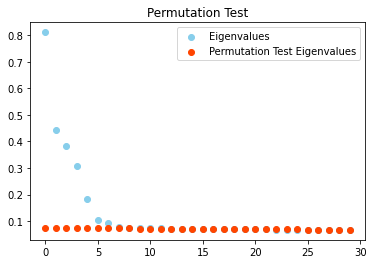

In [66]:
plt.scatter(x = np.arange(0,30), y = 1e-5*np.power(pca.singular_values[0:30],2), color = 'skyblue', label = 'Eigenvalues')
plt.scatter(x = np.arange(0,30), y = 1e-5*np.power(sorted_svalues[0:30],2), color = 'orangered', 
            label = 'Permutation Test Eigenvalues')
plt.legend()
plt.title('Permutation Test')
plot_dictionary['PermTest'] = plt.gca().get_figure()

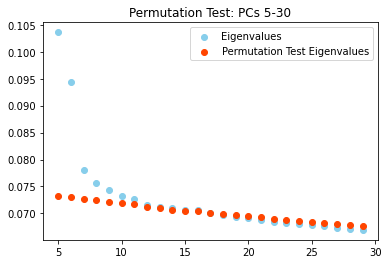

In [67]:
plt.scatter(x = np.arange(5,30), y = 1e-5*np.power(pca.singular_values[5:30],2), color = 'skyblue', label = 'Eigenvalues')
plt.scatter(x = np.arange(5,30), y = 1e-5*np.power(sorted_svalues[5:30],2), color = 'orangered', 
            label = 'Permutation Test Eigenvalues')
plt.legend()
plt.title('Permutation Test: PCs 5-30')
plot_dictionary['PermTestPcs5-30'] = plt.gca().get_figure()

### Export Plots

In [68]:
with PdfPages(output_plots) as pdf:
    for title in plot_dictionary.keys():
        pdf.savefig(plot_dictionary[title])